# Tutorial: with MIBI dataset

Please follow the paradigm when using SpatialTis:

```python
import spatialtis as st
import spatialtis.plotting as sp
```

- `st` is for analysis
- `sp` is for visualization

In [1]:
%config InlineBackend.figure_format='retina'
import anndata as ad
import spatialtis as st
import spatialtis.plotting as sp
from spatialtis import Config

First, let's load the dataset

In [2]:
data = ad.read_h5ad("../data/mibi_TNBC_data.h5ad")
data.obs.head(5)

Patient  area                                         cell_shape  \
0  Patient 1   405  ((36.0, 149.0), (33.0, 150.0), (31.0, 151.0), ...   
1  Patient 1   260  ((30.0, 182.0), (29.0, 185.0), (29.0, 196.0), ...   
2  Patient 1   170  ((29.0, 198.0), (29.0, 211.0), (30.0, 211.0), ...   
3  Patient 1   275  ((32.0, 212.0), (29.0, 213.0), (29.0, 232.0), ...   
4  Patient 1   860  ((51.0, 239.0), (33.0, 242.0), (31.0, 243.0), ...   

                                   centroid  eccentricity  \
0   (36.32839506172839, 161.80987654320987)      0.846855   
1   (37.88076923076923, 190.15769230769232)      0.742389   
2  (35.029411764705884, 203.74117647058824)      0.583451   
3  (34.443636363636365, 224.22545454545454)      0.870150   
4    (44.25581395348837, 254.9279069767442)      0.325646   

                cell_type    Stage  
0  Keratin-positive tumor  Stage 3  
1                   CD3 T  Stage 3  
2  Keratin-positive tumor  Stage 3  
3  Keratin-positive tumor  Stage 3  
4                       B  Stage 3

The `centroid` or the `cell_shape` is not `wkt` format used by spatialtis, we need to transform it. The transformation will automatically set the corresponding configurations for you.

In [56]:
st.transform_points(data, 'centroid', export_key='wkt_centroid')
st.transform_shapes(data, 'cell_shape', export_key='wkt_shape')

SpatialTis has a global configuration system to free user from repeatedly typing the same information.

Most of the configurations is to tell spatialtis the columns of related info.

Make sure you set `Config.roi_key` explicitly.

In [6]:
Config.marker_key = 'markers'
Config.exp_obs = ["Stage", "Patient"]
Config.roi_key = "Patient"
Config.cell_type_key = 'cell_type'

Let's check the current config

In [7]:
Config.view()

               Current configurations of SpatialTis               
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Options                 ‚îÉ Attributes    ‚îÉ Value                ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Multiprocessing         ‚îÇ mp            ‚îÇ True                 ‚îÇ
‚îÇ Verbose                 ‚îÇ verbose       ‚îÇ True                 ‚îÇ
‚îÇ Progress bar            ‚îÇ progress_bar  ‚îÇ False                ‚îÇ
‚îÇ Auto save               ‚îÇ auto_save     ‚îÇ False                ‚îÇ
‚îÇ Experiment observations ‚îÇ exp_obs       ‚îÇ ['Stage', 'Patient'] ‚îÇ
‚îÇ ROI key                 ‚îÇ roi_key       ‚îÇ Patient              ‚îÇ
‚îÇ Cell type key           ‚îÇ cell_type_key ‚îÇ cell_type            ‚îÇ
‚îÇ Marker key              ‚îÇ marker_key    ‚îÇ markers              ‚îÇ
‚îÇ Centroid key            ‚îÇ centroid_key  ‚îÇ wkt_centroid         ‚îÇ
‚îÇ Shape key               ‚îÇ shape_key     ‚îÇ wkt_shape            ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

SpatialTis could help you save your visualization results automatically. By simply setting the following

```python
Config.auto_save = True  # save to default dir
Config.auto_save = "my_result_directory"  # save to custom dir
```


In [ ]:
import matplotlib.pyplot as plt

<AxesSubplot:>

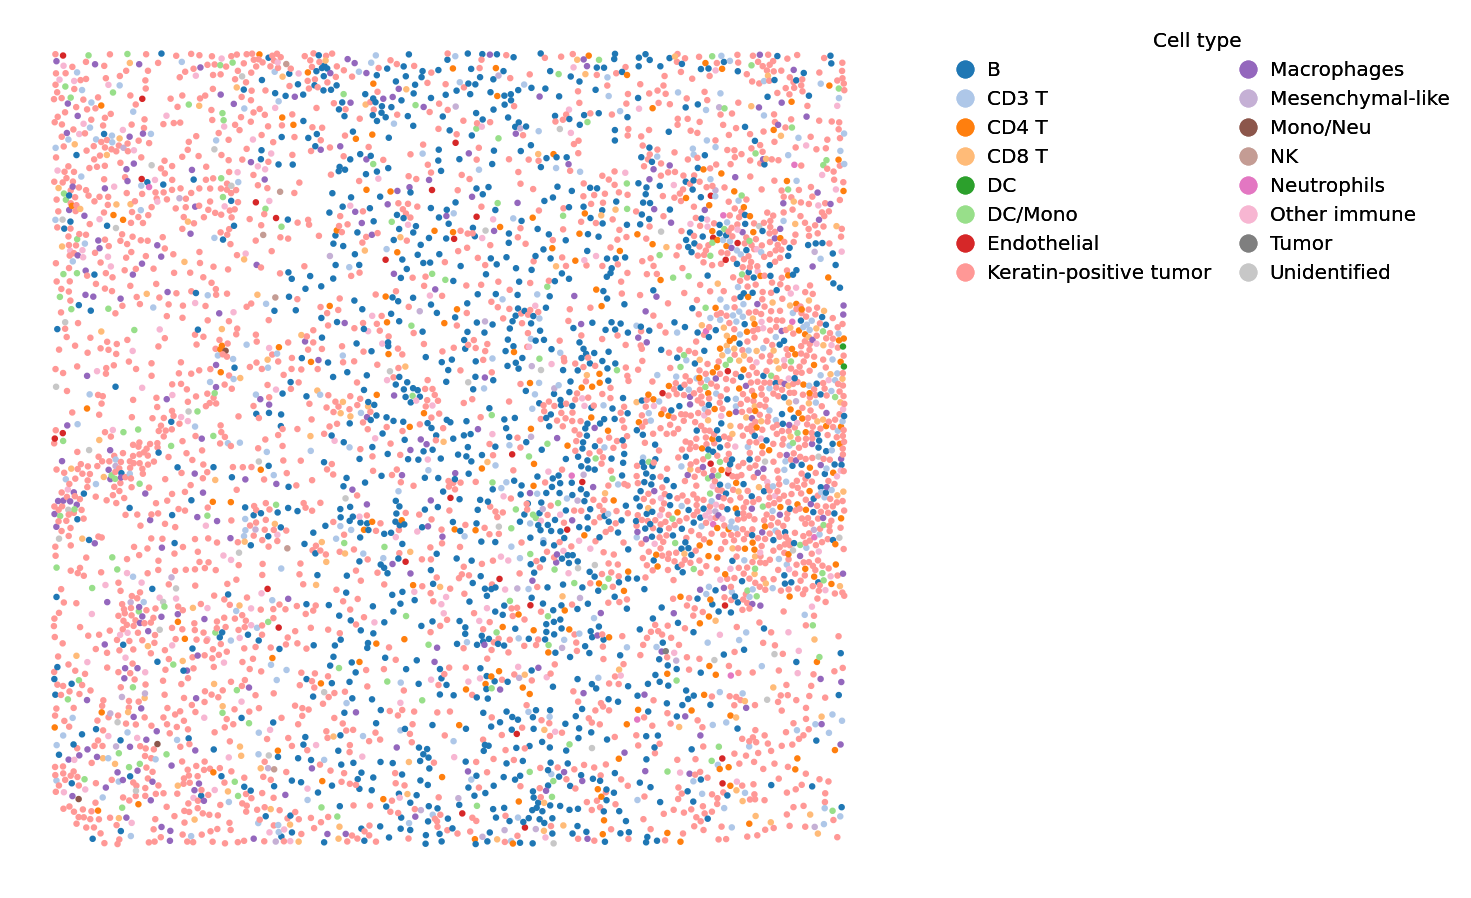

In [36]:
_, ax = plt.subplots(figsize=(13, 8))
sp.cell_map(data, 'Patient 1', ax=ax)

<AxesSubplot:>

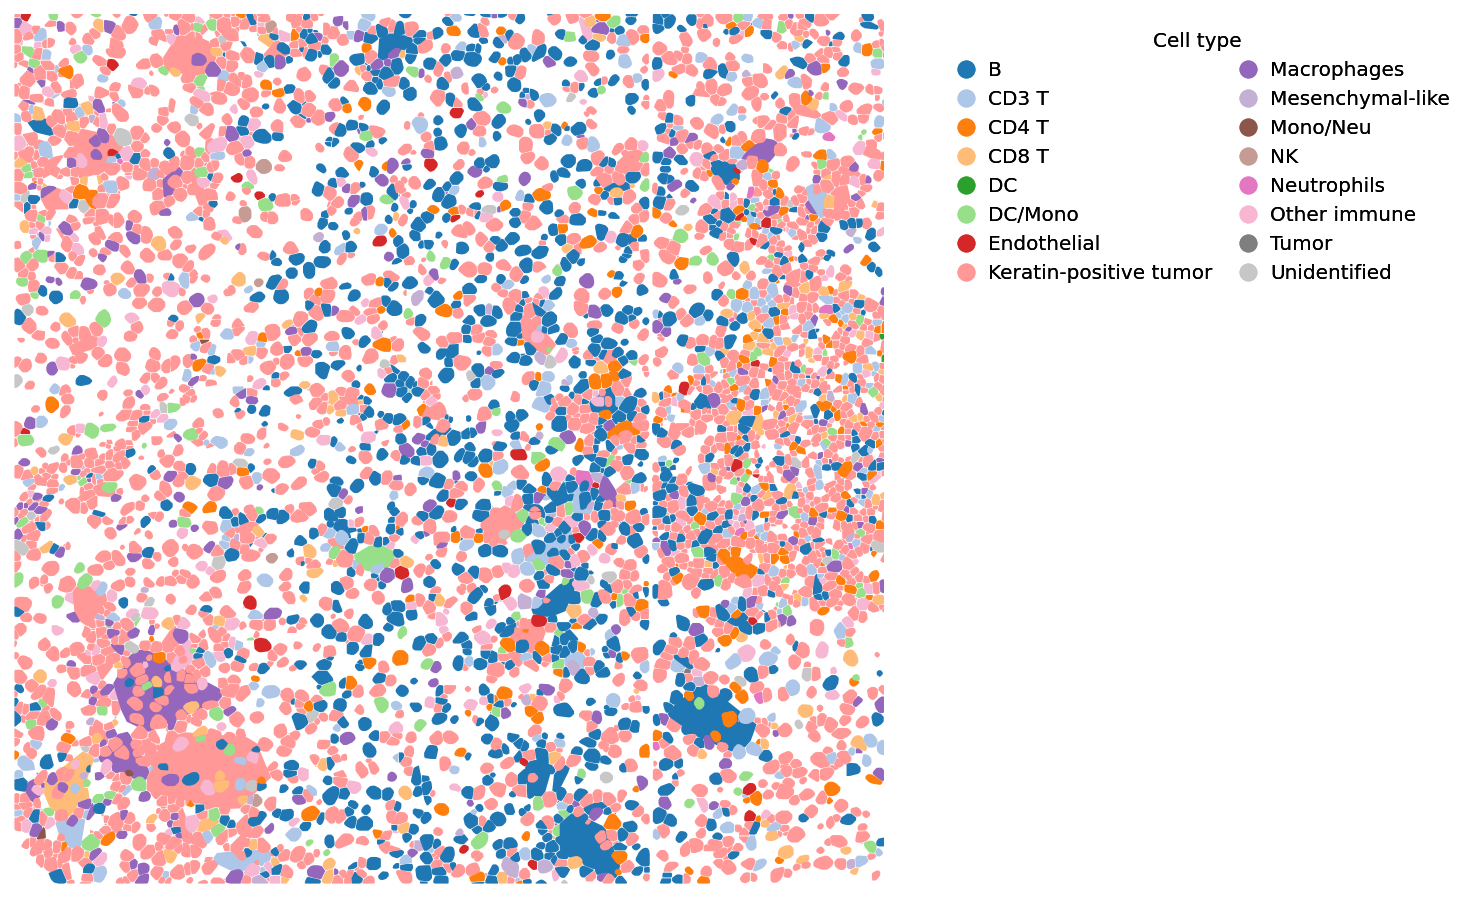

In [37]:
_, ax = plt.subplots(figsize=(13, 8))
sp.cell_map(data, 'Patient 1', use_shape=True, ax=ax)

Now taht we are prepared, We could start off some analysis

In [8]:
_ = st.cell_components(data)

‚è≥ Cell components

üì¶ Added to AnnData, uns: 'cell_components'

‚è± 373ms

If you don't like these information to be printed. Set

```python
Config.verbose = False
```

<AxesSubplot:xlabel='Stage', ylabel='count'>

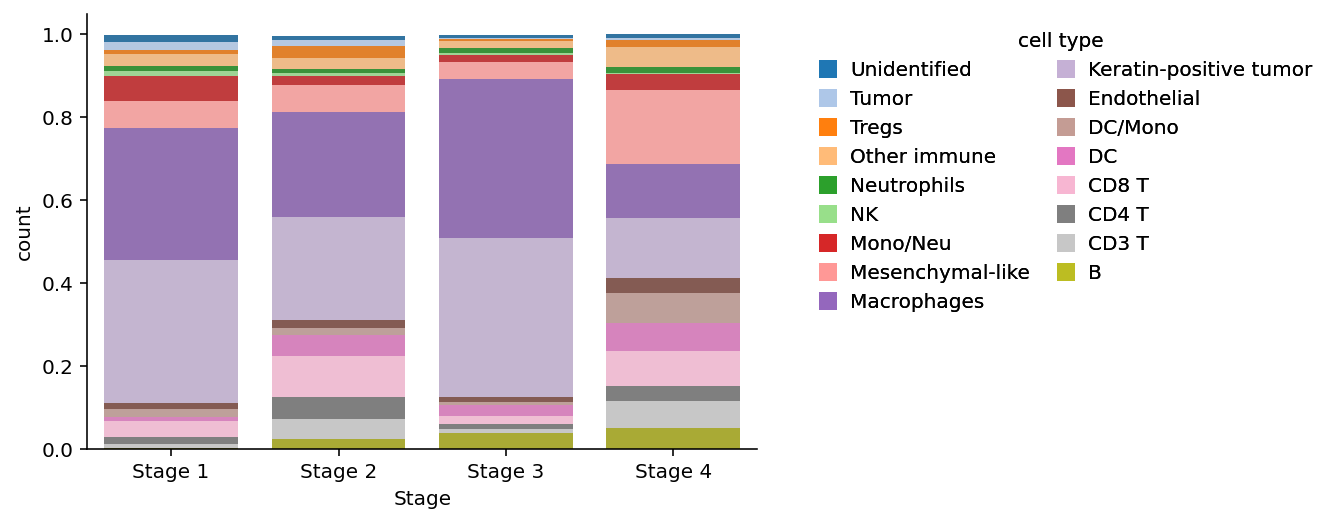

In [24]:
sp.cell_components(data, percentage=True)

In [12]:
_ = st.cell_density(data)

‚è≥ Cell density

üì¶ Added to AnnData, uns: 'cell_density'

‚è± 801ms

<AxesSubplot:xlabel='cell type', ylabel='density'>

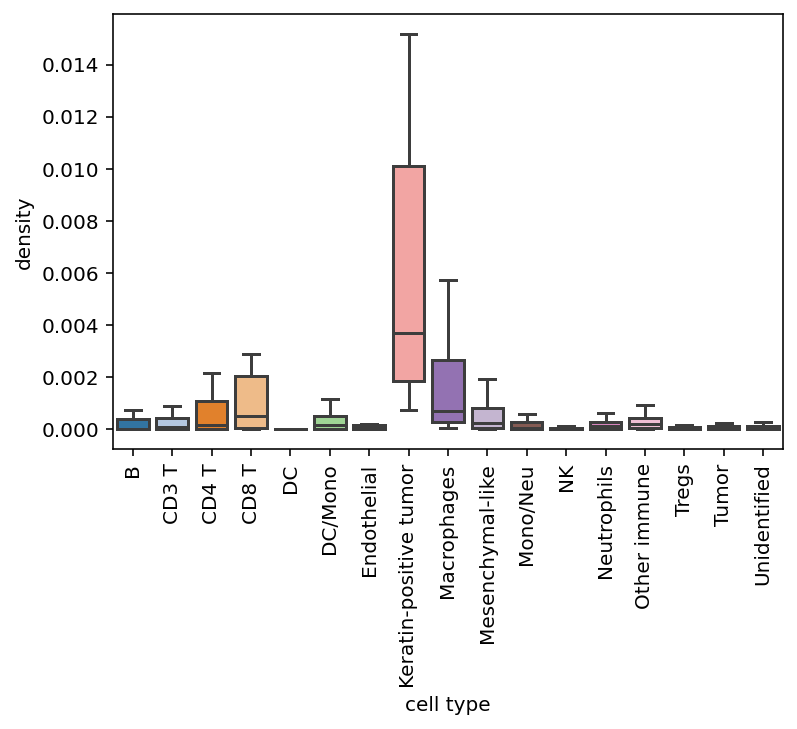

In [23]:
sp.cell_density(data, showfliers=False)

In [38]:
_ = st.cell_morphology(data)

‚è≥ Cell morphology

üì¶ Added to AnnData, obs: 'area'

üì¶ Added to AnnData, obs: 'eccentricity'

‚è± 2s720ms

In [ ]:
sp.cell_morphology(data, 'area', showfliers=False)

In [ ]:
sp.cell_morphology(data, 'eccentricity', showfliers=False)

In [49]:
_ = st.find_neighbors(data, r=40, k=6)

‚è≥ Find neighbors

üõ† Method: kdtree

üì¶ Added to AnnData, obs: 'cell_neighbors'

üì¶ Added to AnnData, obs: 'cell_neighbors_count'

‚è± 1s438ms

<AxesSubplot:>

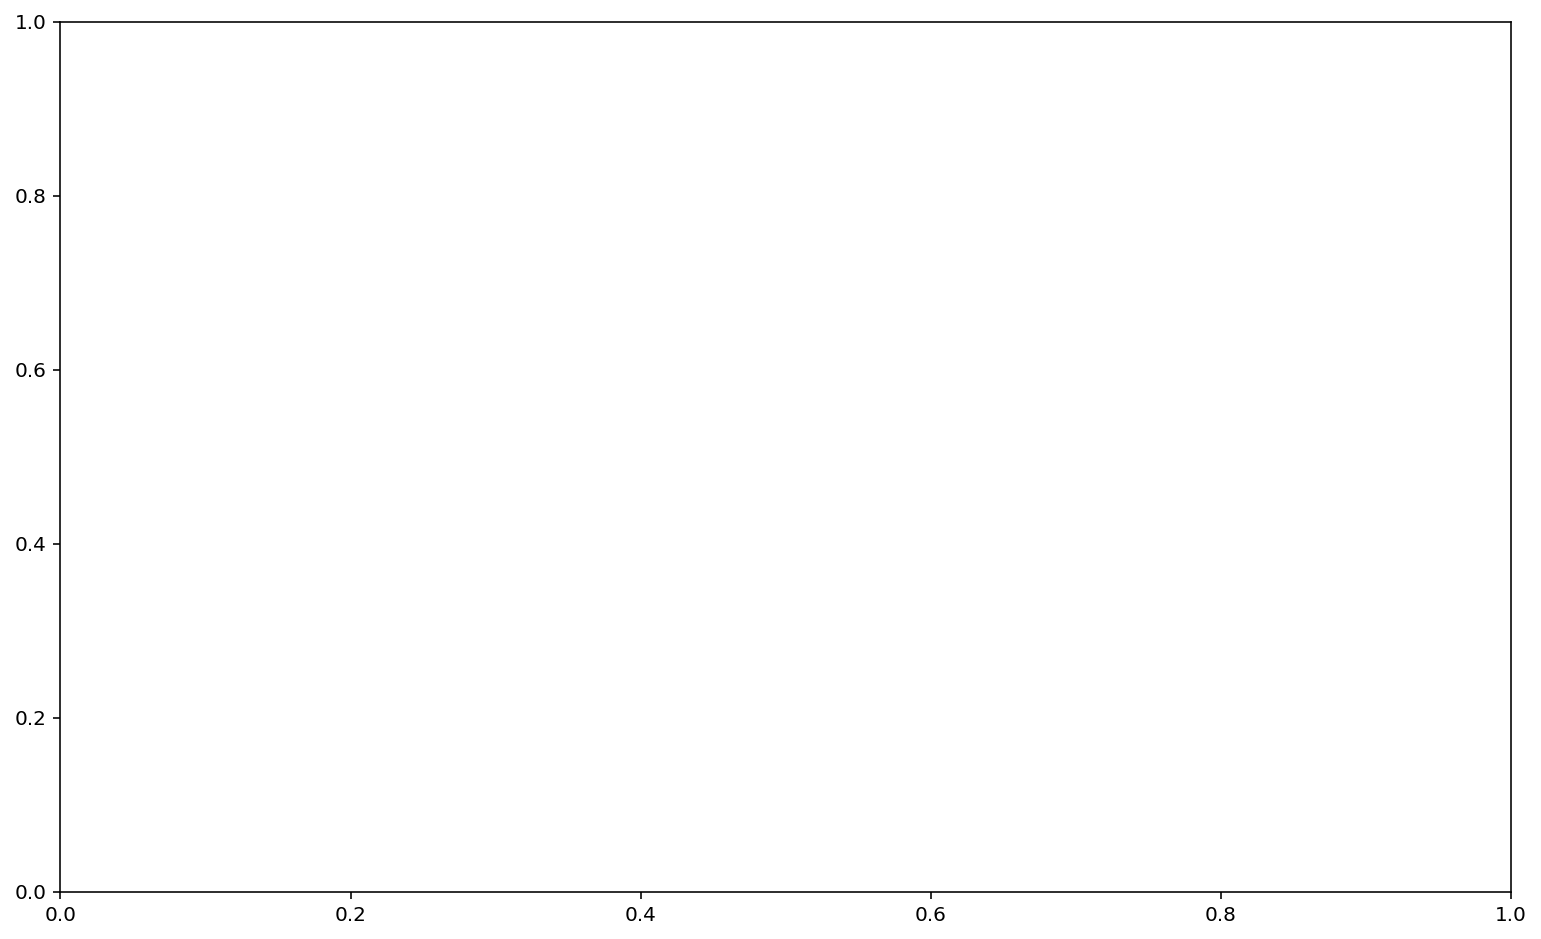

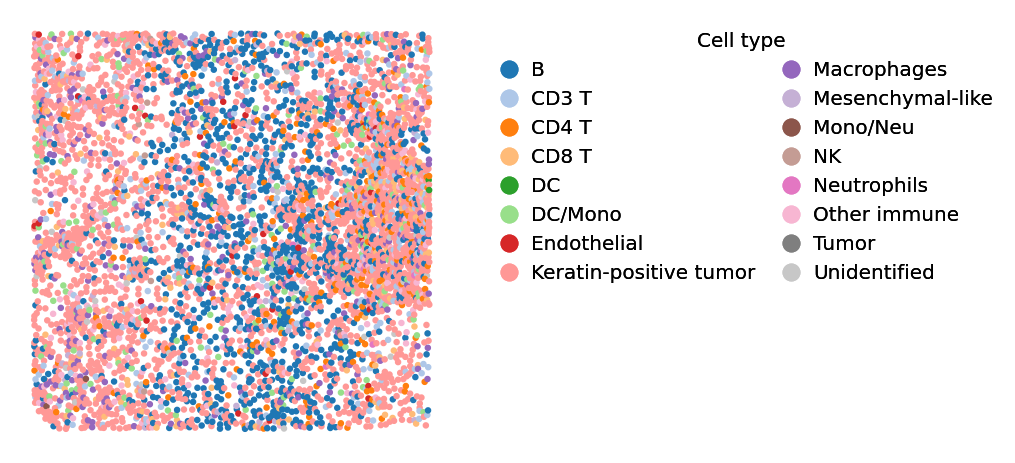

In [44]:
_, ax = plt.subplots(figsize=(13, 8))
sp.neighbors_map(data, 'Patient 1', ax=ax)

In [50]:
_ = st.cell_interaction(data)

‚è≥ Cell interaction

üì¶ Added to AnnData, uns: 'cell_interaction'

‚è± 6s855ms

<AxesSubplot:>

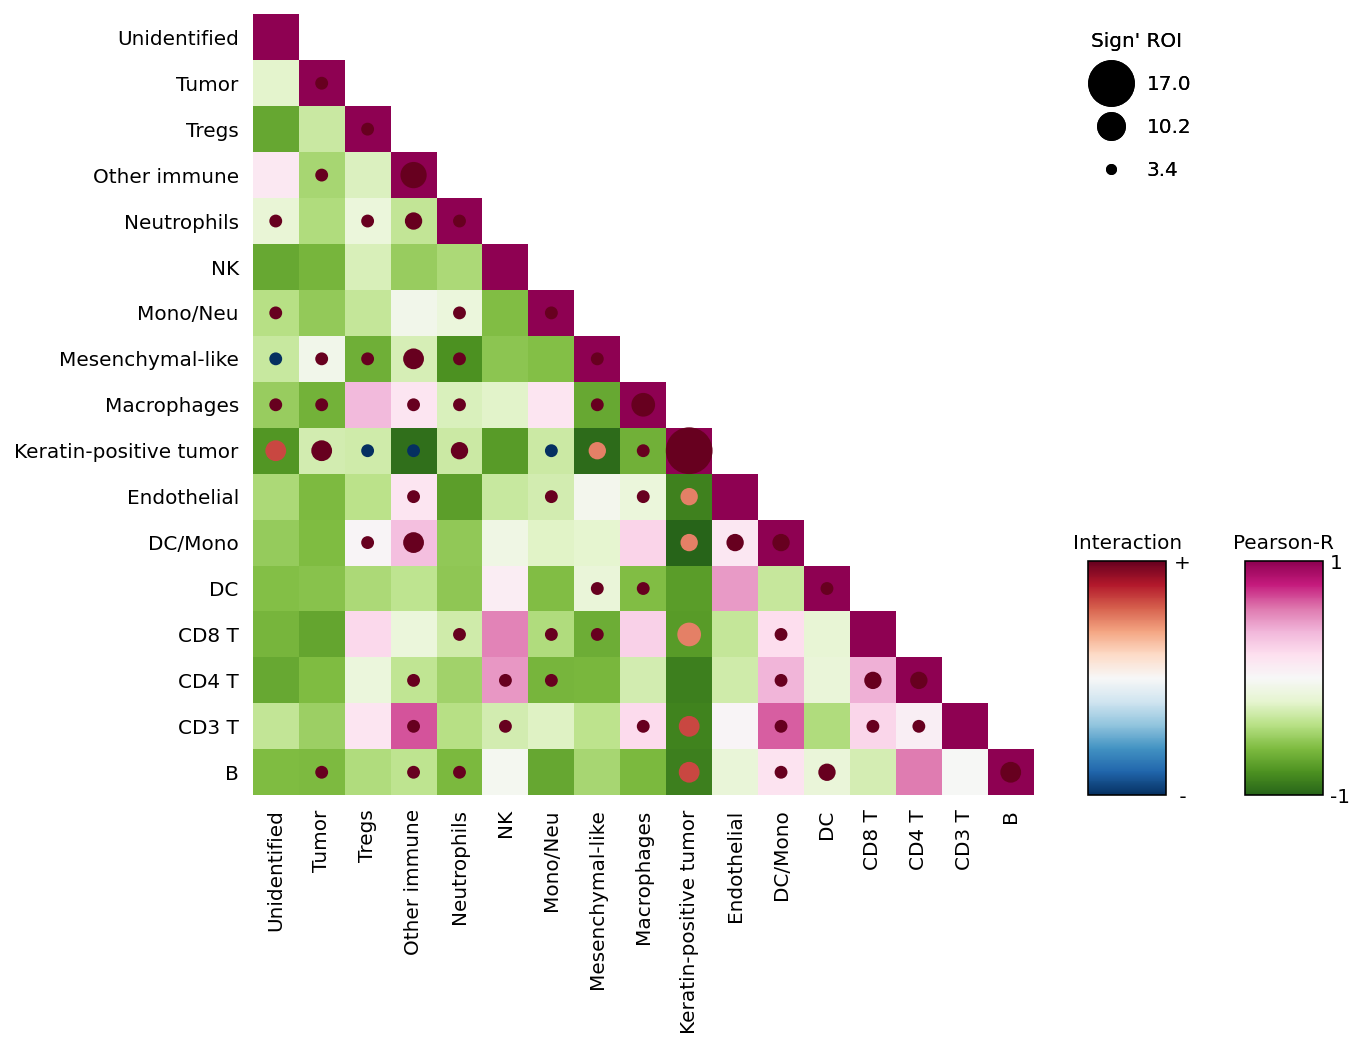

In [52]:
sp.cell_interaction(data, order=False)

In [53]:
st.spatial_enrichment(data)

‚è≥ Spatial enrichment

KeyboardInterrupt: 